# GRIP Internship - The Sparks Foundation

### Author: Harshit Singh

### Task 3 - Data Science and Business Analytics

### Exploratory Data Analysis - Retail

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install plotnine

In [8]:
#Loading the dataset
df=pd.read_csv("SampleSuperstore.csv")
df.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [9]:
df.tail()

Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

In [11]:
df.shape

(9994, 13)

### Data Preprocessing

In [10]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [13]:
df.isnull().sum() #checking for missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [14]:
df.duplicated().sum()

17

In [15]:
df.drop_duplicates() #dropping the duplicates

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9977 rows x 13 columns]

In [16]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Data Cleaning

In [17]:
#dropping irrelevant data
df.drop(columns='Postal Code', inplace= True) 
df

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

     Region         Category Sub-Category     Sales  Quantity  Discount  \
0     South        Furniture    Bookcases  261.9600         2      0.00   
1     South        Furniture       Chairs  731.9400         3      0.00   
2      West  Office Supplies       Labels   14.6200         2      0.00   
3     South        Furniture       Tables  957.5775         5      0.45   
4     South  Office Supplies      Storage   22.3680         2      0.20   
...     ...              ...          ...       ...       ...       ...   
9989  South        Furniture  Furnishings   25.2480         3      0.20   
9990   West        Furniture  Furnishings   91.9600         2      0.00   
9991   West       Technology       Phones  258.5760         2      0.20   
9992   West  Office Supplies        Paper   29.6000         4      0.00   
9993   West  Office Supplies   Appliances  243.1600         2      0.00   

        Profit  
0      41.9136  
1     219.5820  
2       6.8714  
3    -383.0310  
4       2.5164  
...        ...  
9989    4.1028  
9990   15.6332  
9991   19.3932  
9992   13.3200  
9993   72.9480  

[9994 rows x 12 columns]

<AxesSubplot:>

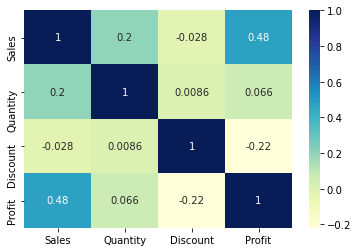

In [18]:
#checking the correlation
corr=df.corr()
sns.heatmap(corr, annot= True, cmap='YlGnBu')

In [19]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=df[['Profit','Discount']] , color='b',label='Discount')
plt.legend()
plt.show()

### Observation:
#### From the above correlation plot, we can see that Discount and Profit are not at all related

In [20]:
df.describe(include='all')

Ship Mode   Segment        Country           City       State  \
count             9994      9994           9994           9994        9994   
unique               4         3              1            531          49   
top     Standard Class  Consumer  United States  New York City  California   
freq              5968      5191           9994            915        2001   
mean               NaN       NaN            NaN            NaN         NaN   
std                NaN       NaN            NaN            NaN         NaN   
min                NaN       NaN            NaN            NaN         NaN   
25%                NaN       NaN            NaN            NaN         NaN   
50%                NaN       NaN            NaN            NaN         NaN   
75%                NaN       NaN            NaN            NaN         NaN   
max                NaN       NaN            NaN            NaN         NaN   

       Region         Category Sub-Category         Sales     Quantity  \
count    9994             9994         9994   9994.000000  9994.000000   
unique      4                3           17           NaN          NaN   
top      West  Office Supplies      Binders           NaN          NaN   
freq     3203             6026         1523           NaN          NaN   
mean      NaN              NaN          NaN    229.858001     3.789574   
std       NaN              NaN          NaN    623.245101     2.225110   
min       NaN              NaN          NaN      0.444000     1.000000   
25%       NaN              NaN          NaN     17.280000     2.000000   
50%       NaN              NaN          NaN     54.490000     3.000000   
75%       NaN              NaN          NaN    209.940000     5.000000   
max       NaN              NaN          NaN  22638.480000    14.000000   

           Discount       Profit  
count   9994.000000  9994.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       0.156203    28.656896  
std        0.206452   234.260108  
min        0.000000 -6599.978000  
25%        0.000000     1.728750  
50%        0.200000     8.666500  
75%        0.200000    29.364000  
max        0.800000  8399.976000

In [21]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df, hue='Category')

<Figure size 1080x1080 with 0 Axes>

From the above plot we can say that our data is not normal and it has some amount of outliers too. Let's explore more about these outliers by using boxplots. 1st we'll check sales from every segments of whole data.

In [22]:
# Which Category has the most no of orders?
sns.countplot(x='Category',data=df)

<AxesSubplot:xlabel='Category', ylabel='count'>

### Observation:
#### Office Supplies has most demand.

In [23]:
salesinstate=df['State'].value_counts().to_frame()
salesinstate.head()

State
California     2001
New York       1128
Texas           985
Pennsylvania    587
Washington      506

Text(0.5, 1.0, 'State Orders')

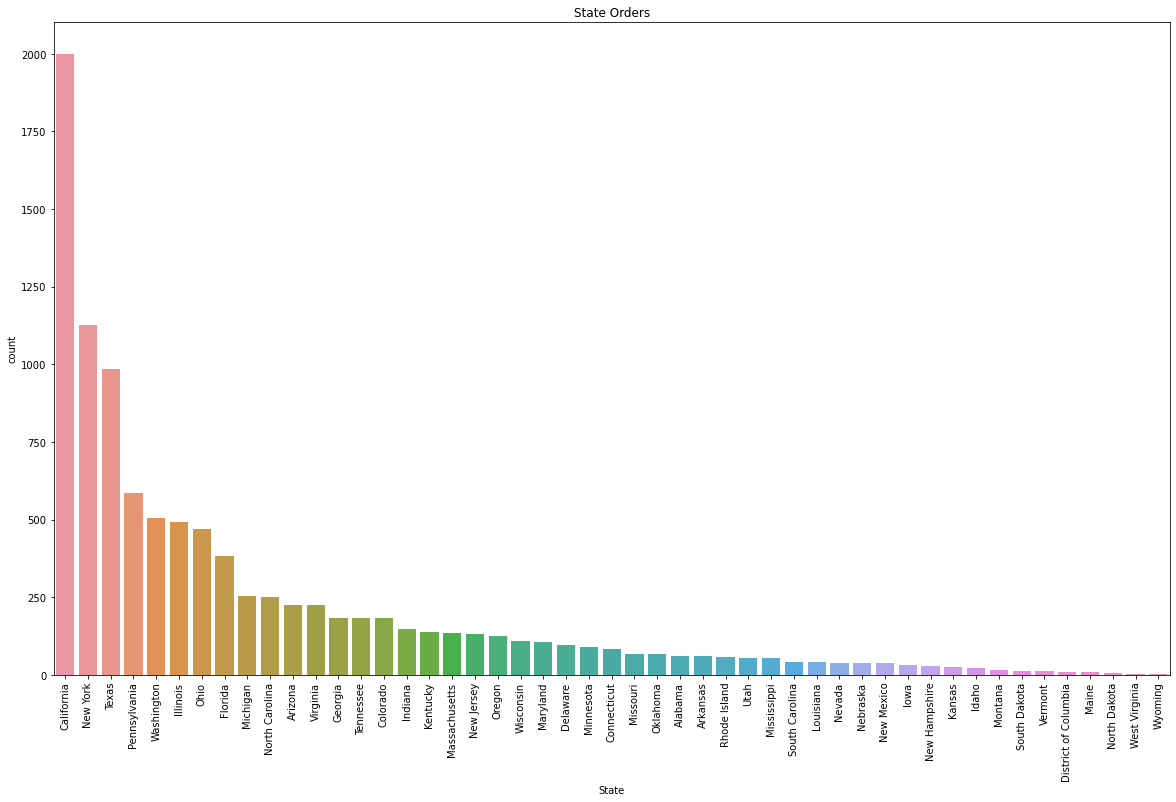

In [24]:
# Orders with respect to States.
plt.figure(figsize=(20,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("State Orders")

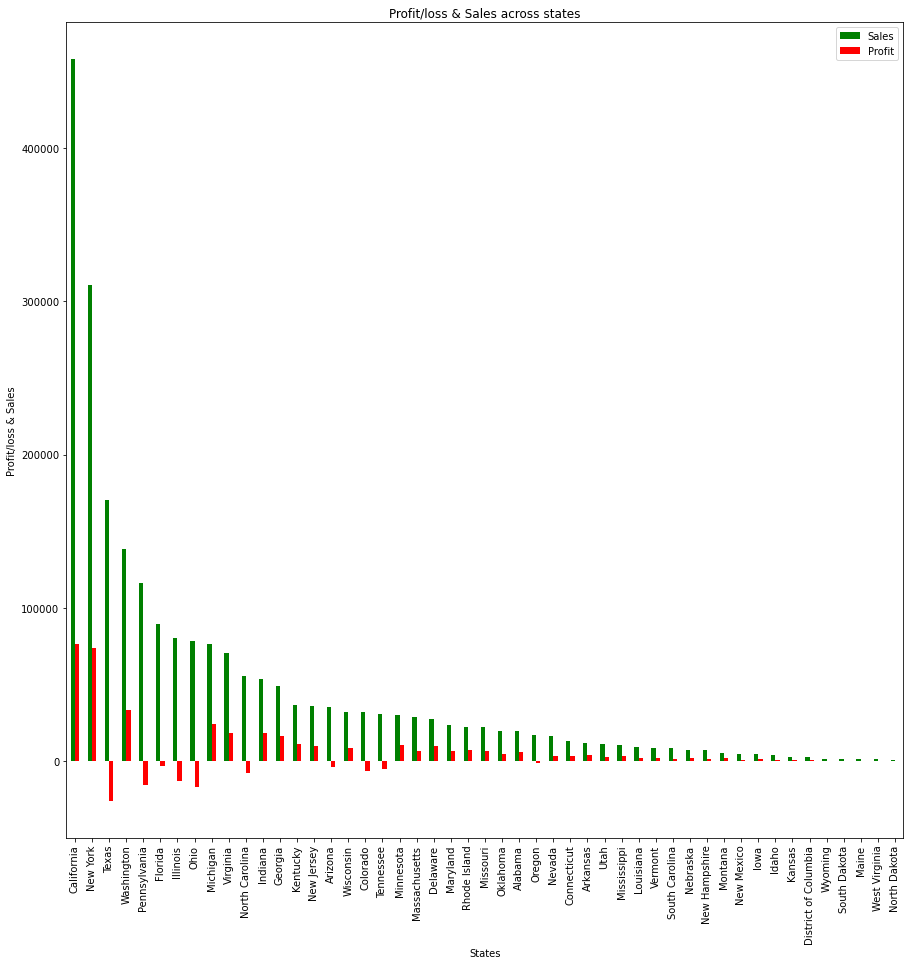

In [25]:
#State vs Grouped(Pales and Profit), also we are sorting Sales in descending order
proloss = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
proloss[:].plot.bar(color=['green','red'],figsize=(15,15))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

# Observation:
#### Texas, Pennsylvania, Florida, Illinois, Ohio, North Carolina, Arizona, Colorado and Tennessee are suffering losses

Text(0.5, 0, 'profit')

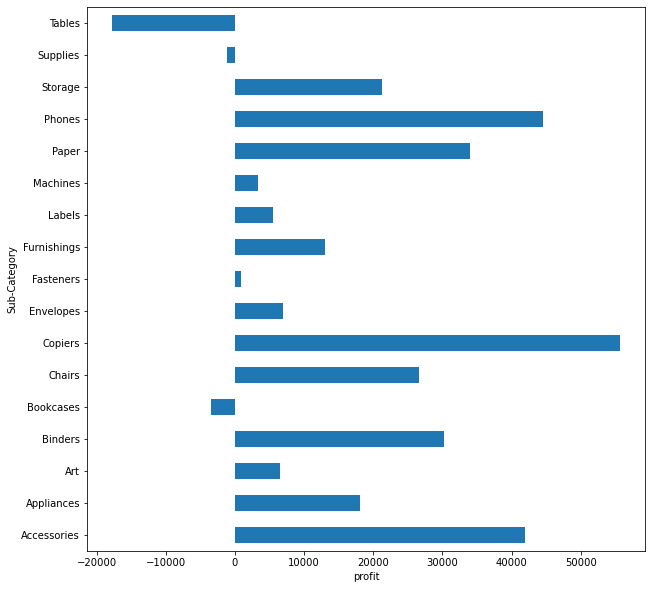

In [26]:
# Which Sub-Category of products contibutes most to profits/losses?
scategoryprice=df.groupby(['Sub-Category'])['Profit'].sum()
plt.figure(figsize=(10,10))
scategoryprice.plot.barh()
plt.xlabel('profit')

### Observation:
#### The above graph clearly shows that Copiers and Phones have highest profit and tables suffer highest loss, followed by bookcases.

In [27]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [28]:
#Categorising Orders on the basis of Shipment Mode.
sns.countplot(x=df['Ship Mode'])

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

### Observation
#### Standard Class is preferred most by customers.

In [29]:
#We group Segment with profit and sales and plot a bar graph
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

In [30]:
df['Sub-Category'].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [32]:
#Percentage of Orders per Sub - Category
plt.figure(figsize=(9,9))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Observation:
#### Maximum produced are Binders, Paper, Furnishings, Phones, Storage, Art, Accessories and Minimum produced are Copiers, Machines, Suppliers

In [34]:
#Plotting Histogram of all the numerical features
df.hist(figsize=(10,10))
plt.show()

### Observation:
#### Most order quantities are of 2 or 3

In [36]:
#Percentage of orders by Region
plt.figure(figsize=(8,6))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

### Observation:
#### East Region gets most no of orders.

In [38]:
#Profit and Sales Comparison for different regions
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','orange'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Observation:
####Central Region is not producing much profits compared to the its sales.

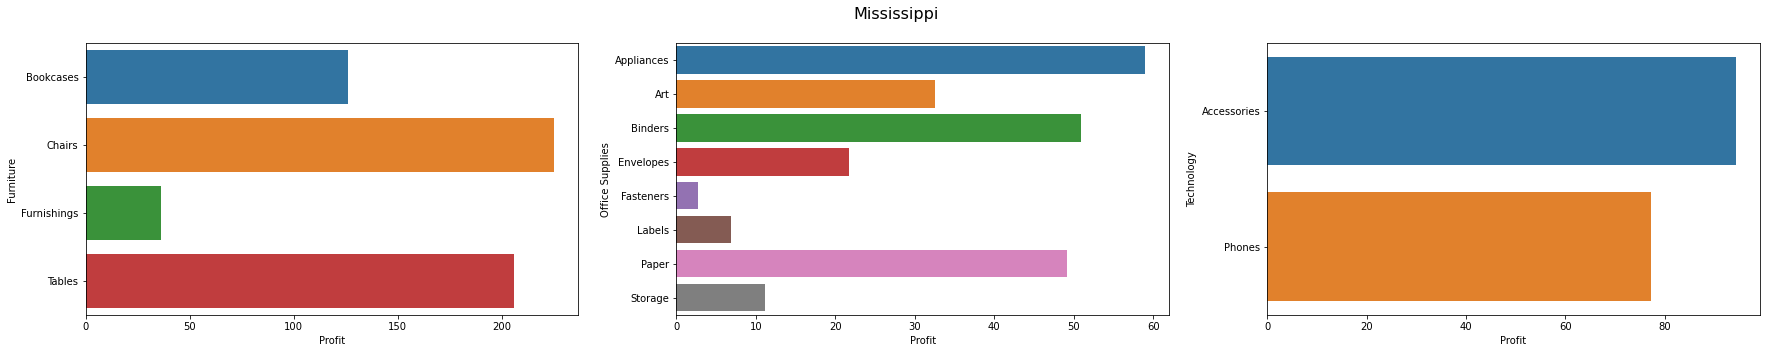

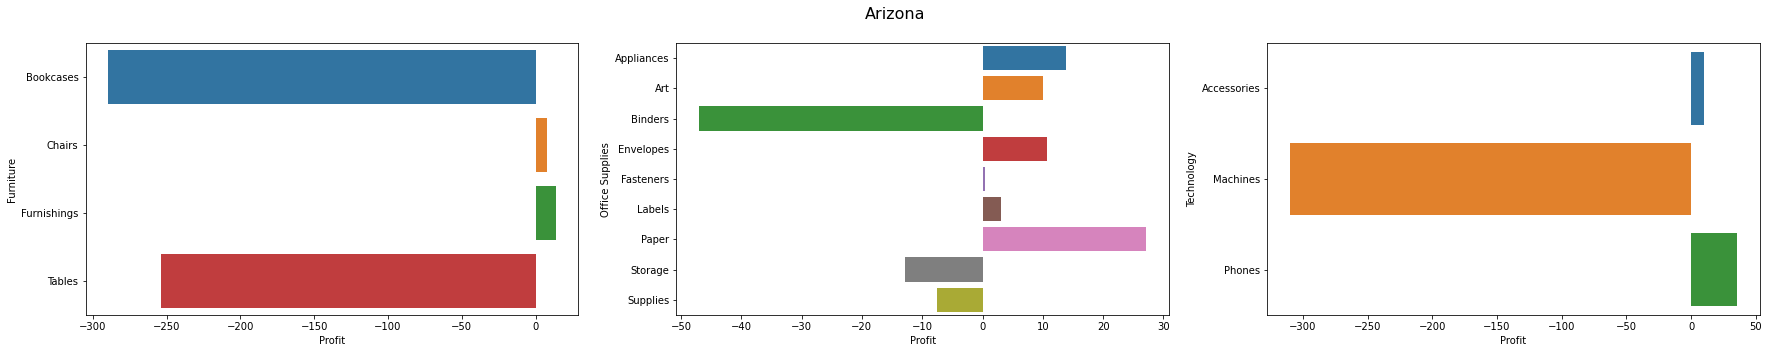

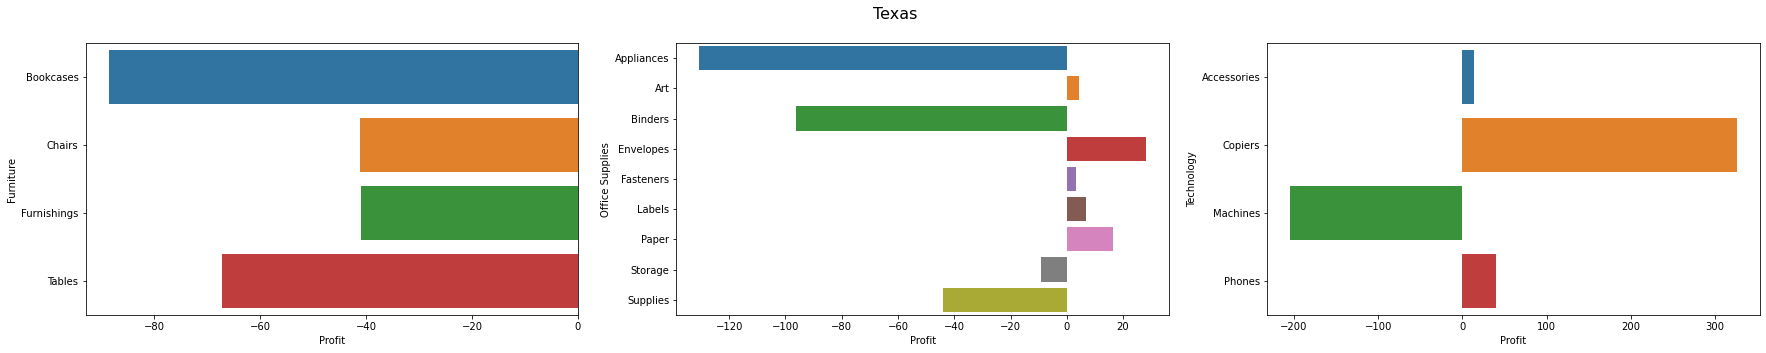

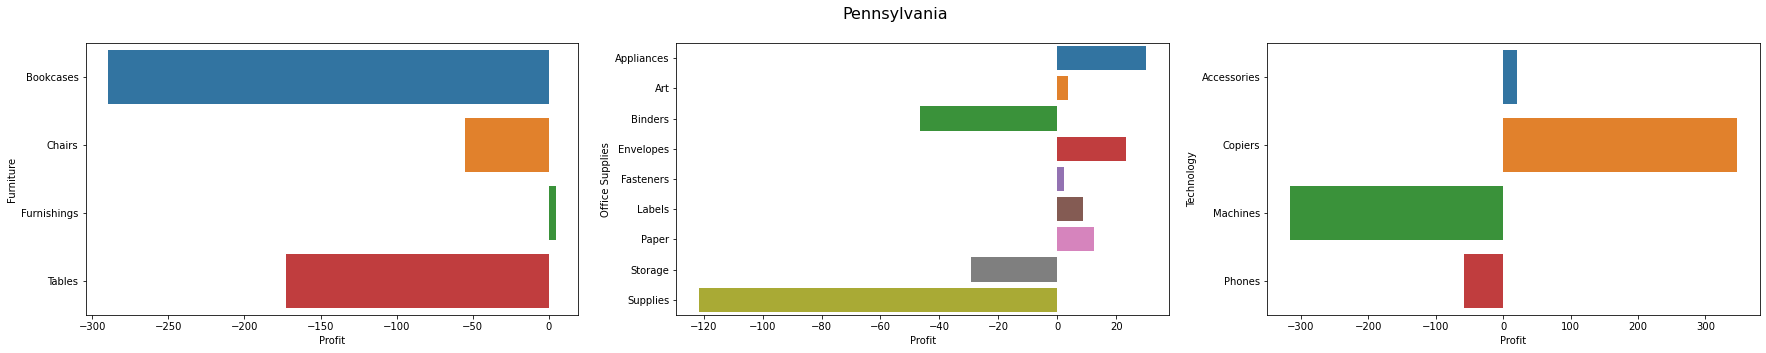

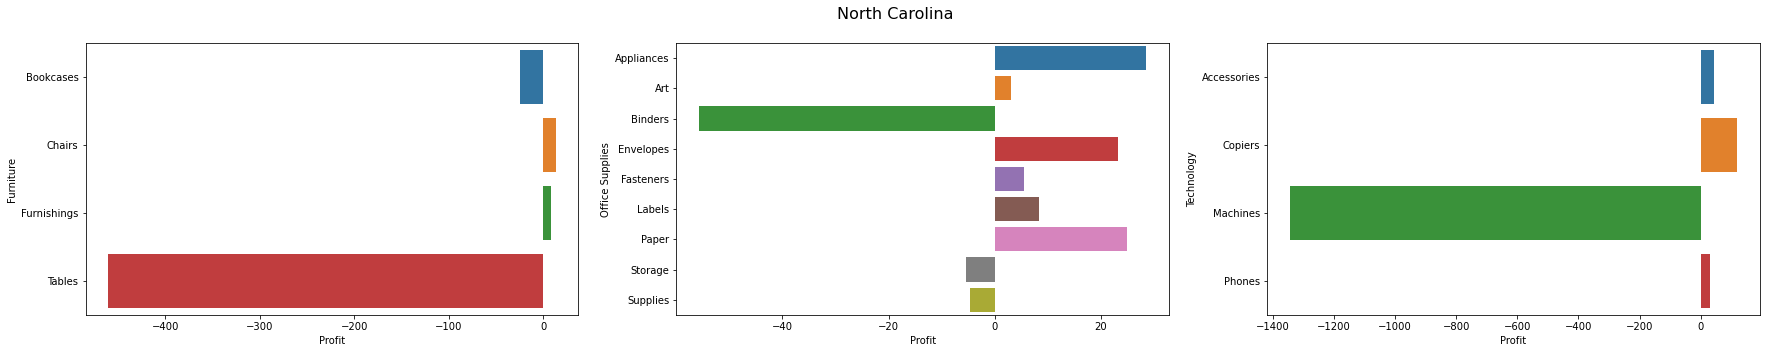

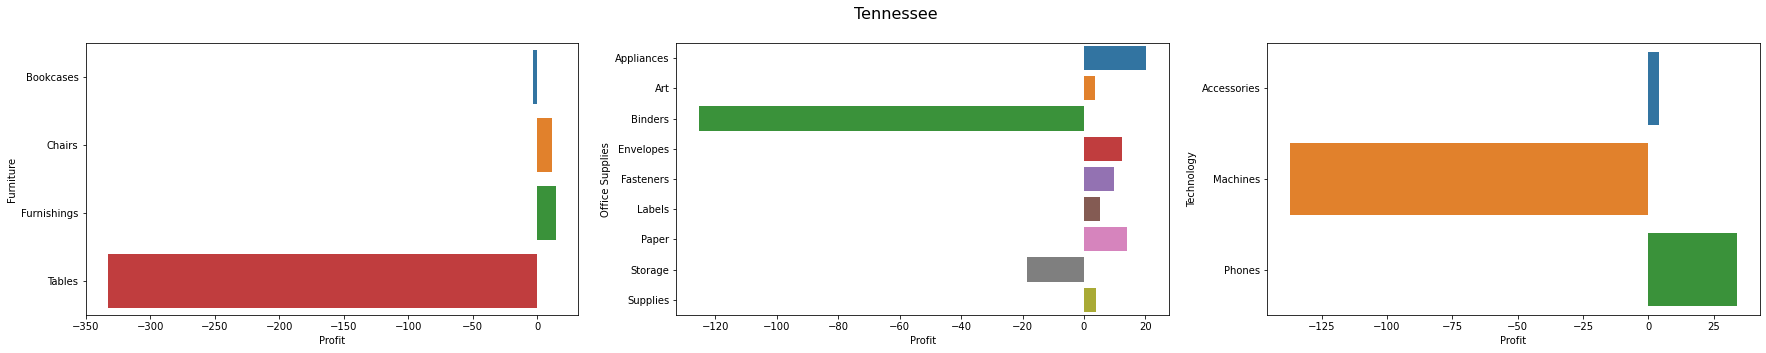

In [39]:
# profit of product categories and sub-categories for the chosen states
def state_data_viewer(states):
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index, 
                        ax = ax[ax_index])
            ax[ax_index].set_ylabel(category)
            ax_index += 1
            # chosen States based on profit/loss categories
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas','Pennsylvania','North Carolina','Tennessee']
state_data_viewer(states)

### Observation:
#### All the major states facing losses are from their orders of machines.

In [40]:
statescategory=df[['Sub-Category','State']]
ss=statescategory.groupby('State')['Sub-Category'].value_counts().to_frame().index.to_frame()
ss


State Sub-Category
State     Sub-Category                        
Alabama   Binders         Alabama      Binders
          Paper           Alabama        Paper
          Art             Alabama          Art
          Accessories     Alabama  Accessories
          Phones          Alabama       Phones
...                           ...          ...
Wisconsin Labels        Wisconsin       Labels
          Tables        Wisconsin       Tables
          Fasteners     Wisconsin    Fasteners
          Supplies      Wisconsin     Supplies
Wyoming   Chairs          Wyoming       Chairs

[656 rows x 2 columns]

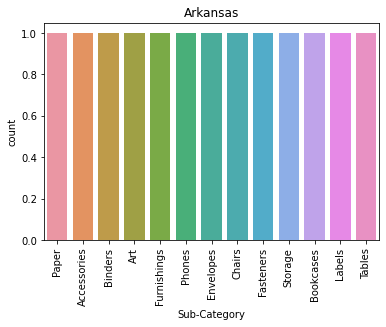

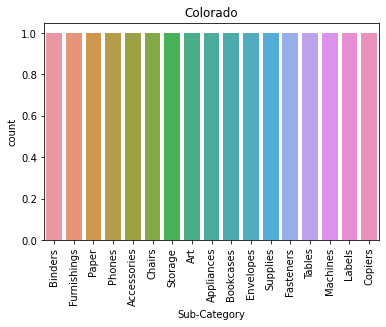

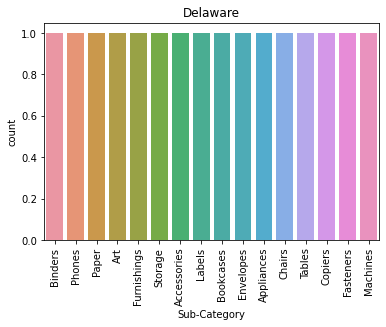

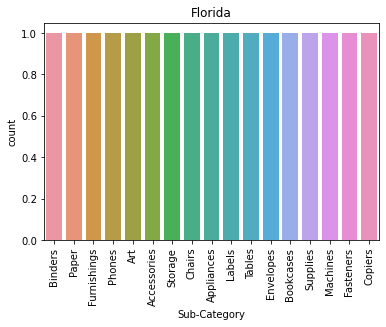

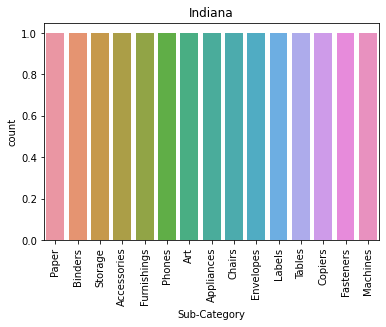

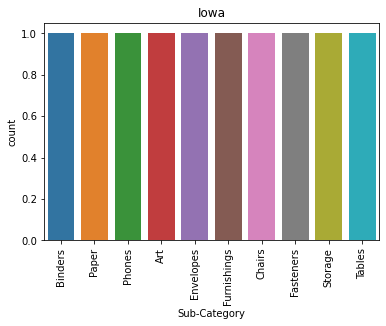

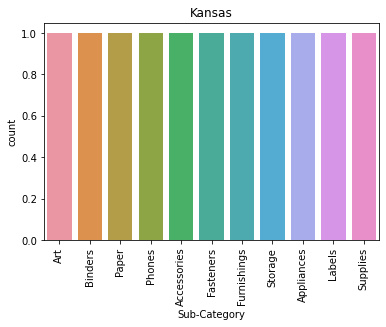

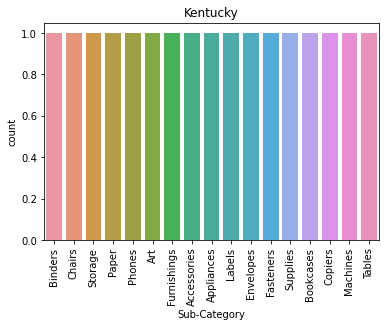

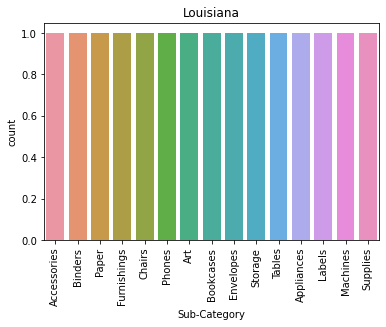

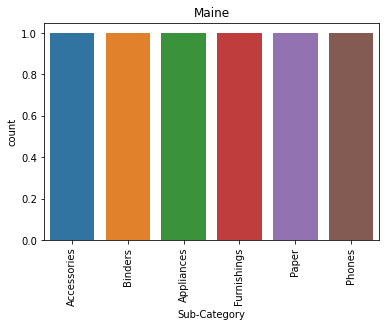

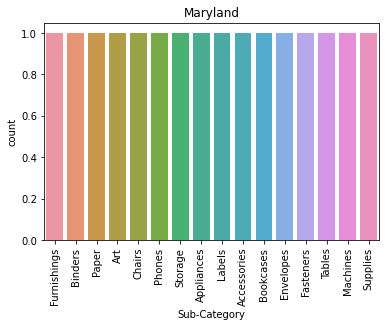

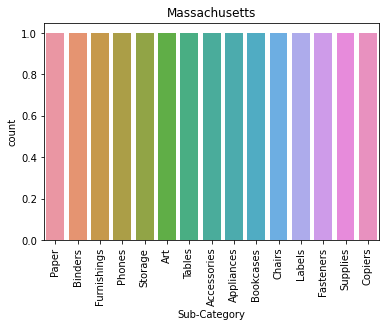

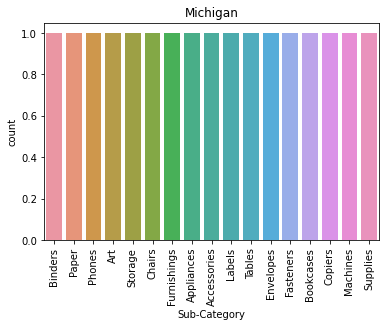

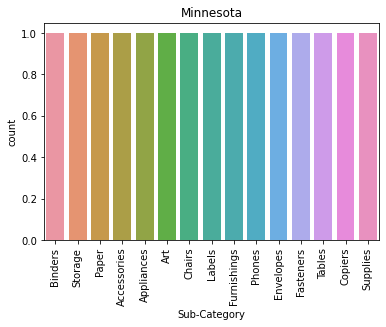

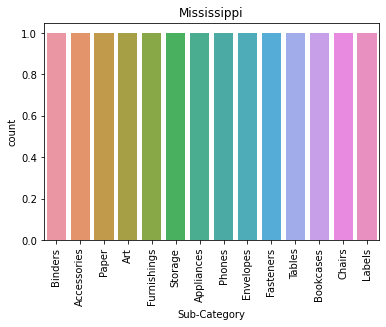

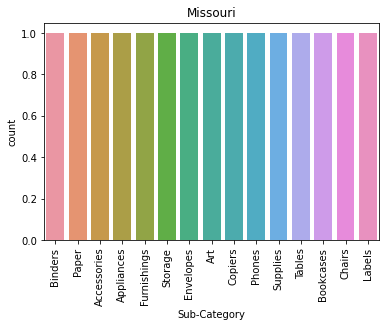

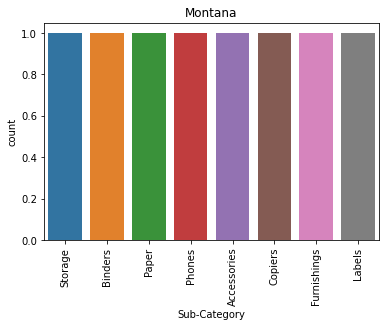

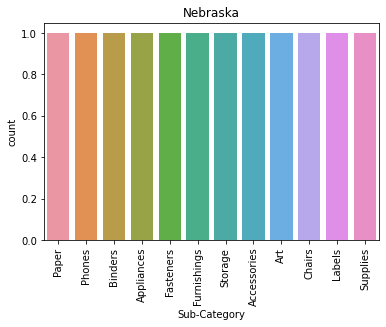

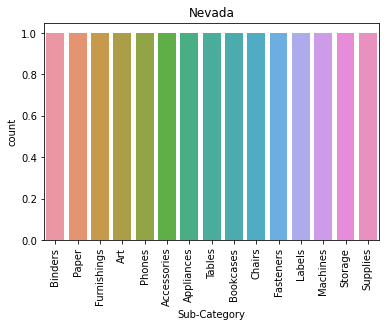

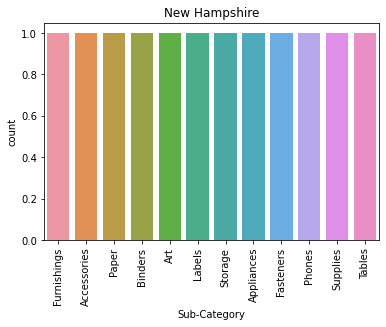

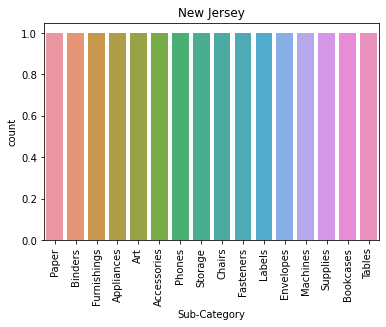

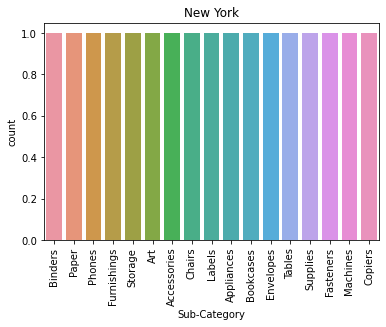

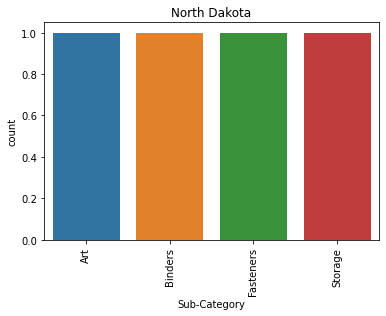

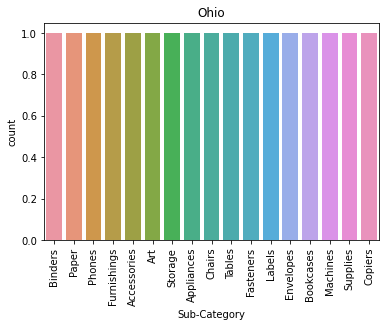

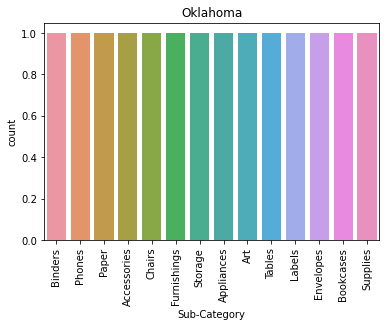

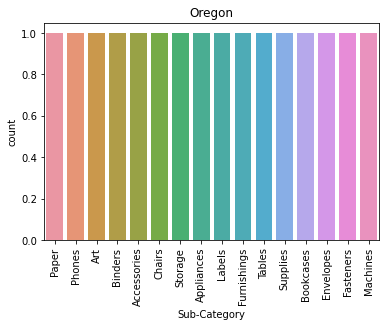

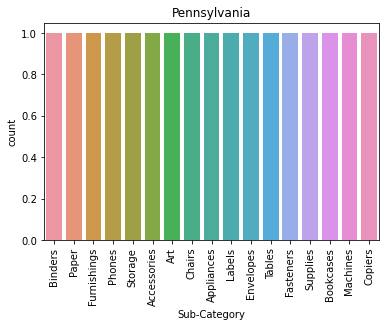

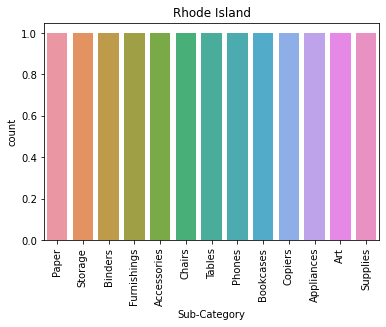

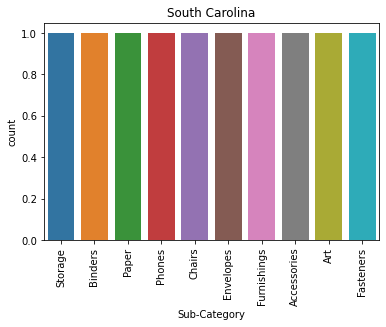

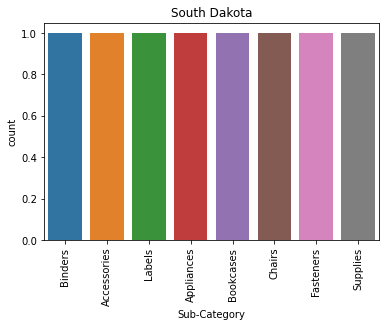

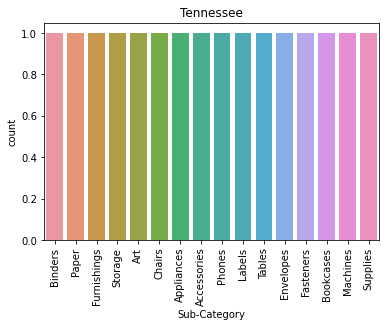

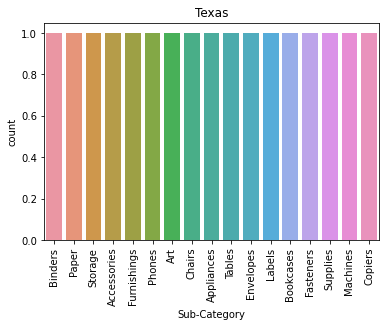

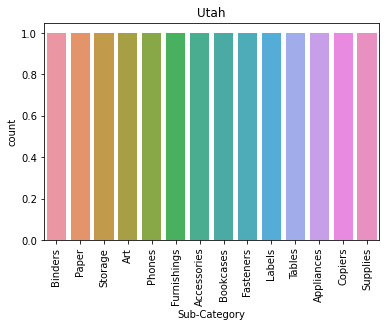

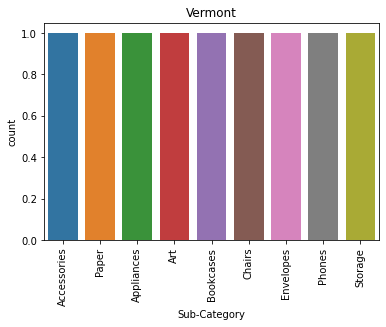

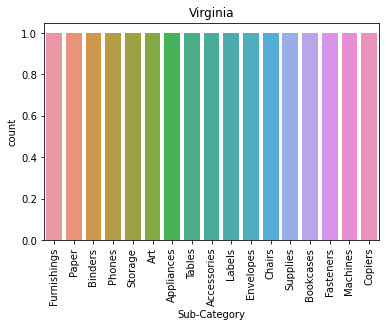

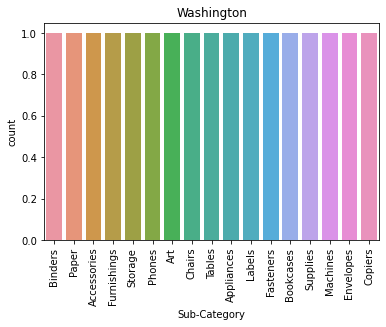

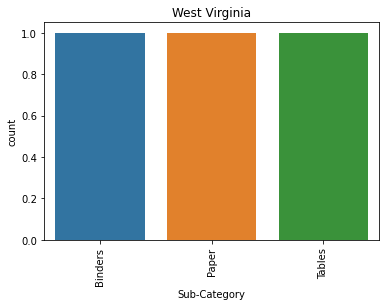

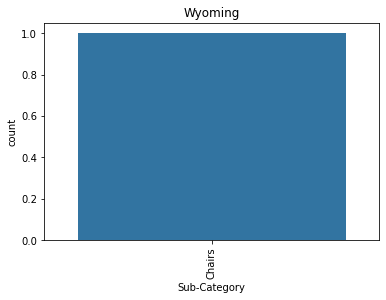

In [41]:
states=ss['State'].unique()
for i in states:
    sns.countplot(x='Sub-Category', data=ss.loc[ss['State']==i])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

### Observation
#### Wisconsin, DoC, Idaho, Maine, North Dakota,South Dakota West Virginia, and Wyoming needs more advertising of our products as the we are definitely not the people's choice for many of our products.

In [44]:
!pip install plotly

  Using cached plotly-5.1.0-py2.py3-none-any.whl (20.6 MB)


In [45]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [48]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [49]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

## Conclusion:
#### Copiers should be produced more and advertised more as they bring in a lot of profit but only meets 0.7% of the total orders.
#### Wisconsin, DoC, Idaho, Maine, North Dakota, South Dakota, West Virginia, and Wyoming needs more advertising of our products as the we are definitely not the people's choice for many of our products. -Texas, Pennsylvania, Florida, Illinois, Ohio, North Carolina, Arizona, Colorado and Tennessee are suffering losses and the main contributor being machines.
#### Tables and bookcases are contributing most in the losses of the company although its getting sheltered by the profits brought in by other products in the same region. 